<a href="https://colab.research.google.com/github/Patrick-Moe/Repository-1/blob/main/First_Blood_live_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Getting the riot API

---



In [5]:
api_key = ''

In [6]:
api_key

''

In [ ]:
#Define the player to get
def get_player(summoner_name_input, api_key):
  api_url = (
      "https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/" +
      summoner_name_input +
      "?api_key="+
      api_key
  )
  while True:
    resp=requests.get(api_url)
    if resp.status_code ==200:
      print("Retrieving now!")
      break
    else:
      print("Either not a player or you mistyped")
      summoner_name_input = input("Please enter a valid summoner name: ")
  data = resp.json()
  return data

This is the input

In [ ]:
summoner_name = input("Please enter a summoner name: ") #input a live character
player_data = get_player(summoner_name, api_key)
print("Summoner Name:", player_data["name"])
print("Summoner ID:", player_data["id"])
print("Summoner Level:", player_data["summonerLevel"])
print("Summoner Puuid:", player_data['puuid'])

Please enter a summoner name: drop top r
Retrieving now!
Summoner Name: Drop Top R
Summoner ID: CmfJStU2mtVxCnO5Rrxgg1RYc8CwU2Gdb8-uvE7Mz_ZPiUI
Summoner Level: 167
Summoner Puuid: OHHiLV8WXn1xkZ2_35Pm8wrRvQrX7KwHJApoFsDmjumtDaX9SKGJx0eUyPkatCUyIKV9oqTly3PmrA


Get the inputs current game

In [ ]:
def match_data(summoner_ID, api_key):  #Get the live match id
  api_url = (
      "https://na1.api.riotgames.com/lol/spectator/v4/active-games/by-summoner/" +
      summoner_ID+
      "?api_key=" +
      api_key
  )
  while True:
    resp=requests.get(api_url)
    if resp.status_code ==200:
      print("Retrieving now!")
      break
    else:
      print("Either not a player or you mistyped")
      summoner_name_input = input("Please enter a valid summoner name: ")
  data = resp.json()
  return data

In [ ]:
summoner_ID = player_data["id"]
matches = match_data(summoner_ID, api_key)
print(matches)

Retrieving now!
{'gameId': 4758824023, 'mapId': 11, 'gameMode': 'CLASSIC', 'gameType': 'MATCHED_GAME', 'gameQueueConfigId': 420, 'participants': [{'teamId': 100, 'spell1Id': 4, 'spell2Id': 14, 'championId': 166, 'profileIconId': 5030, 'summonerName': 'Akshan sama', 'bot': False, 'summonerId': 'n7APKAmMeDoLjL3A8e3uDjUWA1fEv8i6BSmvOum_CfN-iooWyuMo9AyL6Q', 'gameCustomizationObjects': [], 'perks': {'perkIds': [8021, 8009, 9104, 8017, 8451, 8473, 5005, 5008, 5003], 'perkStyle': 8000, 'perkSubStyle': 8400}}, {'teamId': 100, 'spell1Id': 11, 'spell2Id': 4, 'championId': 59, 'profileIconId': 5914, 'summonerName': 'Shook Ones Pt II', 'bot': False, 'summonerId': '-n_cIaYgW96hom7Dq_C_e8YMzjb_C_vpNRAxHMNNluo0vOpRm6rF6uyNww', 'gameCustomizationObjects': [], 'perks': {'perkIds': [8010, 9111, 9104, 8014, 8304, 8347, 5005, 5008, 5002], 'perkStyle': 8000, 'perkSubStyle': 8300}}, {'teamId': 100, 'spell1Id': 6, 'spell2Id': 4, 'championId': 145, 'profileIconId': 4027, 'summonerName': 'CoreTienZ', 'bot': Fa

From current game, get enemy summoner names

In [ ]:
# Get match data using the match_data function
current_match_data = match_data(summoner_ID, api_key)

# Find the participant data for the player summoner
target_participant = None
for participant in current_match_data['participants']:
    if participant['summonerName'] == player_data['name']:
        target_participant = participant
        break

# Extract team ID for the player summoner
if target_participant:
    target_team_id = target_participant['teamId']
else:
    print(f"Summoner '{player_data['name']}' not found in the match data.")
    exit()

# Extract summoner names for the enemy team players
enemy_team_summoner_names = []
for participant in current_match_data['participants']:
    if participant['teamId'] != target_team_id:
        enemy_team_summoner_names.append(participant['summonerName'])

print("Enemy Team summoner names:", enemy_team_summoner_names)

Retrieving now!
Enemy Team summoner names: ['zepacks', 'Kakalón', 'PostHorizon', 'nopbzdb', 'Aipotu']


In [ ]:
enemy_team_summoner_names

['zepacks', 'Kakalón', 'PostHorizon', 'nopbzdb', 'Aipotu']

From enemy summoner names, get enemy puuid

In [ ]:
# Base URL for summoner information endpoint
base_url = "https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/"
enemy_puuid = []

for name in enemy_team_summoner_names:
    # Construct the URL for the specific summoner
    url = f"{base_url}{name}?api_key={api_key}"

    # Make the API request
    response = requests.get(url)

    if response.status_code == 200:
        summoner_data = response.json()
        enemy_puuid.append(summoner_data['puuid'])
        print(f"Summoner Name: {summoner_data['name']}")
        print(f"Summoner ID: {summoner_data['id']}")
        print(f"Summoner Level: {summoner_data['summonerLevel']}")
        print(f"Summoner puuid: {summoner_data['puuid']}")
        print("-" * 30)
    else:
        print(f"Error fetching summoner data for {name}")

# Print the list of enemy puuid values
print("Enemy PUUIDs:", enemy_puuid)


Summoner Name: zepacks
Summoner ID: 6pUVkJ92sjThpayanuKxIhf5FGzjaUwPPGrcAzuo-c--I40
Summoner Level: 501
Summoner puuid: NRsR8cfpr2xqTR8Oz5-xes1yESjcO5__TpLfQtCymWqs3E-jrKuqfke5Y1KsrordYeZJiJDGOt9rFQ
------------------------------
Summoner Name: Kakalón
Summoner ID: W7dsj12NyvalY5UmyS3RmoLPiJiOcra-GQiqnbxN-VaViLw
Summoner Level: 108
Summoner puuid: lwBgdiPr4PEOA5NiwFaQ_I4Sw8a4b6tfwKoOaakGwu0QQPTHM_He8ztP_UuoHOuMz11JTq3rcjSnwg
------------------------------
Summoner Name: PostHorizon
Summoner ID: SiAhZqYwumOtkNQl71rpNMfYieIbKpfEVSadLjvdjNmVkR4
Summoner Level: 471
Summoner puuid: SyiUZWy3Afyvd-DfDWaJWFkkNs9YSGO0WhtEX9FHPVQ3T9Yby426y0g4rgu0GiOPQ_AjYVoQTChXfw
------------------------------
Summoner Name: nopbzdb
Summoner ID: nfyKpbkLFaWofCIiBiVvx_JKzEkz6vmK4u9cIvBx1dS_Osp49BrAXHBtNw
Summoner Level: 106
Summoner puuid: tf1-FW404WkRRwD_1-IL73n7aHrdfWNGiEa_o4aUv8Y-XWgdzLjjohSNUTLuCmhhd0imAuIDq1OzDg
------------------------------
Summoner Name: Aipotu
Summoner ID: e_vi5n5pEbR9K-fwL96XLX0VhuZiZo

In [ ]:
print("Enemy puuid:", enemy_puuid)  #Get the enemy puuid's into a dataset

Enemy puuid: ['NRsR8cfpr2xqTR8Oz5-xes1yESjcO5__TpLfQtCymWqs3E-jrKuqfke5Y1KsrordYeZJiJDGOt9rFQ', 'lwBgdiPr4PEOA5NiwFaQ_I4Sw8a4b6tfwKoOaakGwu0QQPTHM_He8ztP_UuoHOuMz11JTq3rcjSnwg', 'SyiUZWy3Afyvd-DfDWaJWFkkNs9YSGO0WhtEX9FHPVQ3T9Yby426y0g4rgu0GiOPQ_AjYVoQTChXfw', 'tf1-FW404WkRRwD_1-IL73n7aHrdfWNGiEa_o4aUv8Y-XWgdzLjjohSNUTLuCmhhd0imAuIDq1OzDg', '0EfCALiTU1MMwItahKOGA7f2A-PO04Pv7FOgMpcgfBSjE7sxCK7SbtwSW5c-0xW-arSYr9hp20jagA']


from enemy puuids, get enemy match history. Store results in a dictionary with key based off summoner name

In [ ]:
# Create a dictionary to store match IDs for each summoner
enemy_match_ids_dict = {}

# Loop through the summoner names and puuids together
for summoner_name, puuid in zip(enemy_team_summoner_names, enemy_puuid):
    # Construct the URL for match IDs
    url = f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start=0&count=20&api_key={api_key}"

    # Make the API request
    response = requests.get(url)

    if response.status_code == 200:
        match_ids = response.json()
        enemy_match_ids_dict[summoner_name] = match_ids
        print(f"Match IDs for summoner {summoner_name}: {match_ids}")
    else:
        print(f"Error fetching match IDs for summoner {summoner_name}")

# Print the dictionary of match IDs for each summoner
for summoner_name, match_ids in enemy_match_ids_dict.items():
    print(f"Summoner Name: {summoner_name}")
    print(f"Match IDs: {match_ids}")
    print("-" * 30)


Match IDs for summoner zepacks: ['NA1_4758781191', 'NA1_4758748274', 'NA1_4758731842', 'NA1_4758706805', 'NA1_4758678225', 'NA1_4758659956', 'NA1_4758638133', 'NA1_4758614077', 'NA1_4758514073', 'NA1_4755115898', 'NA1_4755090688', 'NA1_4755076379', 'NA1_4755062625', 'NA1_4755025185', 'NA1_4754910887', 'NA1_4754889014', 'NA1_4754881078', 'NA1_4754874788', 'NA1_4754030455', 'NA1_4754009313']
Match IDs for summoner Kakalón: ['NA1_4758786139', 'NA1_4758755766', 'NA1_4758728909', 'NA1_4758711939', 'NA1_4758681927', 'NA1_4758659956', 'NA1_4758638133', 'NA1_4758612718', 'NA1_4758585938', 'NA1_4758562176', 'NA1_4758549110', 'NA1_4758530274', 'NA1_4758520034', 'NA1_4758502085', 'NA1_4758485548', 'NA1_4758469363', 'NA1_4758456512', 'NA1_4758452105', 'NA1_4758432815', 'NA1_4758238165']
Match IDs for summoner PostHorizon: ['NA1_4758662275', 'NA1_4756744969', 'NA1_4756697002', 'NA1_4756634965', 'NA1_4756614295', 'NA1_4756608219', 'NA1_4756577669', 'NA1_4756578834', 'NA1_4756567031', 'NA1_4756556103

In [ ]:
enemy_match_ids_dict

{'zepacks': ['NA1_4758781191',
  'NA1_4758748274',
  'NA1_4758731842',
  'NA1_4758706805',
  'NA1_4758678225',
  'NA1_4758659956',
  'NA1_4758638133',
  'NA1_4758614077',
  'NA1_4758514073',
  'NA1_4755115898',
  'NA1_4755090688',
  'NA1_4755076379',
  'NA1_4755062625',
  'NA1_4755025185',
  'NA1_4754910887',
  'NA1_4754889014',
  'NA1_4754881078',
  'NA1_4754874788',
  'NA1_4754030455',
  'NA1_4754009313'],
 'Kakalón': ['NA1_4758786139',
  'NA1_4758755766',
  'NA1_4758728909',
  'NA1_4758711939',
  'NA1_4758681927',
  'NA1_4758659956',
  'NA1_4758638133',
  'NA1_4758612718',
  'NA1_4758585938',
  'NA1_4758562176',
  'NA1_4758549110',
  'NA1_4758530274',
  'NA1_4758520034',
  'NA1_4758502085',
  'NA1_4758485548',
  'NA1_4758469363',
  'NA1_4758456512',
  'NA1_4758452105',
  'NA1_4758432815',
  'NA1_4758238165'],
 'PostHorizon': ['NA1_4758662275',
  'NA1_4756744969',
  'NA1_4756697002',
  'NA1_4756634965',
  'NA1_4756614295',
  'NA1_4756608219',
  'NA1_4756577669',
  'NA1_4756578834',
 

With enemy match history, get the match history of the previous 20 games of each player

In [ ]:
base_url = "https://americas.api.riotgames.com/lol/match/v5/matches/"

# Dictionary to store match details for each summoner
match_details_dict = {}

for summoner_name, match_ids in enemy_match_ids_dict.items():
    summoner_match_details = {}

    for match_id in match_ids:
        # Construct the URL for match details
        url = f"{base_url}{match_id}?api_key={api_key}"

        while True:
            # Make the API request
            response = requests.get(url)

            if response.status_code == 200:
                match_data = response.json()
                match_details = {
                    'Match ID': match_data['metadata']['matchId'],
                    'Game Mode': match_data['info']['gameMode'],
                    'Game Type': match_data['info']['gameType']
                }
                summoner_match_details[match_id] = match_details
                break  # Break out of the while loop since request was successful
            elif response.status_code == 429:
                print("Rate limit exceeded. Waiting for 1 minute...")
                time.sleep(60)
            else:
                print(f"Error fetching match details for match ID {match_id}")
                break

        match_details_dict[summoner_name] = summoner_match_details

# Print the dictionary of match details
for summoner_name, match_id_details in match_details_dict.items():
    print(f"Summoner Name: {summoner_name}")
    for match_id, match_details in match_id_details.items():
        print(f"Match ID: {match_id}")
        print(f"Game Mode: {match_details['Game Mode']}")
        print(f"Game Type: {match_details['Game Type']}")
        print("-" * 30)


Rate limit exceeded. Waiting for 1 minute...
Summoner Name: zepacks
Match ID: NA1_4758781191
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758748274
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758731842
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758706805
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758678225
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758659956
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758638133
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758614077
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758514073
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4755115898
Game Mode: CLASS

Filters the games above to only classic games. Or normal/ranked league of legends


In [ ]:
# Filter out non-CLASSIC game mode matches
filtered_match_details = {
    summoner_name: {
        match_id: match_data
        for match_id, match_data in matches.items()
        if match_data['Game Mode'] == 'CLASSIC'
    }
    for summoner_name, matches in match_details_dict.items()
}

# Print the filtered match details dictionary
for summoner_name, matches in filtered_match_details.items():
    print(f"Summoner Name: {summoner_name}")
    for match_id, match_data in matches.items():
        print(f"Match ID: {match_id}")
        print(f"Game Mode: {match_data['Game Mode']}")
        print(f"Game Type: {match_data['Game Type']}")
        print("-" * 30)

Summoner Name: zepacks
Match ID: NA1_4758781191
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758748274
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758731842
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758706805
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758678225
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758659956
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758638133
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758614077
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4758514073
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------------------
Match ID: NA1_4755115898
Game Mode: CLASSIC
Game Type: MATCHED_GAME
------------------

From the above filter, we now get the timeline data from all of the games above, to determine whether or not there was a first blood

In [ ]:
# Dictionary to store filtered timeline history
filtered_timeline = {}

# Iterate through filtered_match_details
for summoner_name, matches in filtered_match_details.items():
    filtered_timeline[summoner_name] = {}  # Initialize the dictionary for each summoner
    for match_id, match_data in matches.items():
        # Get the match timeline URL
        timeline_url = f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}/timeline?api_key={api_key}"

        # Make the API request for match timeline
        response = requests.get(timeline_url)

        if response.status_code == 200:
            timeline_data = response.json()

            # Check for the KILL_FIRST_BLOOD event at 120 seconds (120000 milliseconds)
            frames = timeline_data['info']['frames']
            for frame in frames:
                for event in frame['events']:
                    if event['type'] == 'CHAMPION_KILL' and event['timestamp'] <= 120000:
                        filtered_timeline[summoner_name][match_id] = event
                        break  # No need to continue checking events in this match
        elif response.status_code == 429:
                print("Rate limit exceeded. Waiting for 1 minute...")
                time.sleep(60)
        else:
            print(f"Error fetching timeline for match ID {match_id}")

# Print the filtered timeline
for summoner_name, matches in filtered_timeline.items():
    print(f"Summoner Name: {summoner_name}")
    for match_id, event_data in matches.items():
        print(f"Match ID: {match_id}")
        print(f"Event Type: {event_data['type']}")
        print(f"Event Timestamp: {event_data['timestamp']}")
        print("-" * 30)


Summoner Name: zepacks
Match ID: NA1_4758731842
Event Type: CHAMPION_KILL
Event Timestamp: 88220
------------------------------
Match ID: NA1_4758678225
Event Type: CHAMPION_KILL
Event Timestamp: 66752
------------------------------
Match ID: NA1_4758638133
Event Type: CHAMPION_KILL
Event Timestamp: 72390
------------------------------
Match ID: NA1_4755115898
Event Type: CHAMPION_KILL
Event Timestamp: 40754
------------------------------
Match ID: NA1_4754881078
Event Type: CHAMPION_KILL
Event Timestamp: 50688
------------------------------
Match ID: NA1_4754030455
Event Type: CHAMPION_KILL
Event Timestamp: 81975
------------------------------
Match ID: NA1_4754009313
Event Type: CHAMPION_KILL
Event Timestamp: 39095
------------------------------
Summoner Name: Kakalón
Match ID: NA1_4758786139
Event Type: CHAMPION_KILL
Event Timestamp: 71780
------------------------------
Match ID: NA1_4758638133
Event Type: CHAMPION_KILL
Event Timestamp: 72390
------------------------------
Match ID:

From there, we get all of the match data of the matches above which have a first blood and save it into a dictionary

In [ ]:
# Dictionary to store the result
first_blood_data = {}

# Iterate through filtered_timeline
for summoner_name, matches in filtered_timeline.items():
    # Count the number of first blood matches
    num_first_blood_matches = len(matches)

    # Get the match data for first blood matches
    match_data = {}
    for match_id in matches.keys():
        match_url = f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={api_key}"
        response = requests.get(match_url)

        if response.status_code == 200:
            match_data[match_id] = response.json()
        elif response.status_code == 429:
                print("Rate limit exceeded. Waiting for 1 minute...")
                time.sleep(60)
        else:
            print(f"Error fetching match data for match ID {match_id}")

    # Store the data in the result dictionary
    first_blood_data[summoner_name] = {
        'num_first_blood_matches': num_first_blood_matches,
        'match_data': match_data
    }

# Print the result
for summoner_name, data in first_blood_data.items():
    print(f"Summoner Name: {summoner_name}")
    print(f"Number of First Blood Matches: {data['num_first_blood_matches']}")
    print("Match Data:")
    for match_id, match in data['match_data'].items():
        print(f"Match ID: {match_id}")
        print("Match Data:", match)
        print("-" * 30)
    print("=" * 50)

Summoner Name: zepacks
Number of First Blood Matches: 7
Match Data:
Match ID: NA1_4758731842
Match Data: {'metadata': {'dataVersion': '2', 'matchId': 'NA1_4758731842', 'participants': ['ss7kCD9YVH59ELmpegOpLn4SkllJQD5XswTgWM6a2pNHKrmUR0SME4Opk7cXoG2Kfph--Qbv219Vfg', 'gxvMv6QUgCcMUysfCE4jm6hEfG33Qa52zw_hte7S723gtDGSpP_uwDomWbUnZTW97gMnoWgTta2q-w', 'ExPvPuIcaLppFxxkgXKXD9FuJ8mbHqlpP4ps0G48w-bKFr1tb1896d7tHId273p_yrhI6VwvUsPSbg', 'EXceskcrNYl0ru1yffY3ZywwFJR0aZoMdSHb1uxRaABRZcm_jwyVHt_QnYIrsVE1v85zp3V2_C0yxg', 'NRsR8cfpr2xqTR8Oz5-xes1yESjcO5__TpLfQtCymWqs3E-jrKuqfke5Y1KsrordYeZJiJDGOt9rFQ', 'HiDgtJNXLBp-jmhPr0PkODoJQiG0NBOkcAL64_1oC4WdMGtSlk7i4Eaxx9upm9BvgYr8Mq38jSMIBg', 'Oy8jF8UMrJQJ5WuvlPRnjuN_JM1Gl72DxLsO_Ux5SeCkZwjd20LitF8miGBgJFFtnCzBgSw7Xc6e3A', 'nxDzwNVZcZcyA8im-s0i6YC2SVZoLI4l-AwMH5km6Z0Tmir-m8ox0a6jqfMzywiD6IdVFZ0cGwQ7BA', 'qj9dBb9LlapCzNXktjgs5WxkcP-QhvfllrxexY0DLi6Wsi1XSbnyOF8QP80KSg-9qfoKjd6lCwfC3w', 'S5wz-q0Dxmc1ztQ9K7l5Iq0K6KtZ5f4F-Fem7p2MgP9Du7igcKXfbN9MWSxHfgr-BYMokWjrzQtk

This seperates the data into games where they won or lost

In [ ]:
# Dictionary to store the outcome of each match for each summoner
match_outcomes = {}

# Iterate through the first_blood_data dictionary
for summoner_name, data in first_blood_data.items():
    match_data = data['match_data']

    # Initialize lists to store match IDs for wins and losses
    won_matches = []
    lost_matches = []

    for match_id, match in match_data.items():
        # Extract the outcome of the match (win or lose) from match data
        if 'info' in match and 'teams' in match['info']:
            for team in match['info']['teams']:
                if team['teamId'] == 100:  # Team ID 100 is blue side
                    if team['win']:
                        won_matches.append(match_id)
                    else:
                        lost_matches.append(match_id)
                    break

    match_outcomes[summoner_name] = {
        'won_matches': won_matches,
        'lost_matches': lost_matches
    }

# Print the match outcomes
for summoner_name, outcomes in match_outcomes.items():
    print(f"Summoner Name: {summoner_name}")
    print(f"Won Matches: {outcomes['won_matches']}")
    print(f"Lost Matches: {outcomes['lost_matches']}")
    print("=" * 50)

Summoner Name: zepacks
Won Matches: ['NA1_4758731842', 'NA1_4758678225', 'NA1_4754881078', 'NA1_4754030455']
Lost Matches: ['NA1_4758638133', 'NA1_4755115898', 'NA1_4754009313']
Summoner Name: Kakalón
Won Matches: ['NA1_4758612718', 'NA1_4758549110', 'NA1_4758530274']
Lost Matches: ['NA1_4758786139', 'NA1_4758638133']
Summoner Name: PostHorizon
Won Matches: ['NA1_4755687487']
Lost Matches: ['NA1_4755737402', 'NA1_4755732359', 'NA1_4755725070', 'NA1_4755722826']
Summoner Name: nopbzdb
Won Matches: ['NA1_4757598136', 'NA1_4757556267', 'NA1_4757495803']
Lost Matches: ['NA1_4758383107']
Summoner Name: Aipotu
Won Matches: []
Lost Matches: ['NA1_4758037984', 'NA1_4492401640']


From the games where they won or lost, retrieve the total time of each game in seconds

In [ ]:
# Assuming first_blood_data is a dictionary containing match data
for summoner_name, data in first_blood_data.items():
    match_data = data.get('match_data', {})
    for match_id, match_info in match_data.items():
        if 'info' in match_info:
            match_duration = match_info['info']['gameDuration']
            print(f"Summoner Name: {summoner_name}, Match ID: {match_id}, Duration: {match_duration} seconds")
        else:
            print(f"Match data not found for summoner {summoner_name}, Match ID: {match_id}")


Summoner Name: zepacks, Match ID: NA1_4758731842, Duration: 1180 seconds
Summoner Name: zepacks, Match ID: NA1_4758678225, Duration: 1385 seconds
Summoner Name: zepacks, Match ID: NA1_4758638133, Duration: 1413 seconds
Summoner Name: zepacks, Match ID: NA1_4755115898, Duration: 1341 seconds
Summoner Name: zepacks, Match ID: NA1_4754881078, Duration: 1188 seconds
Summoner Name: zepacks, Match ID: NA1_4754030455, Duration: 2113 seconds
Summoner Name: zepacks, Match ID: NA1_4754009313, Duration: 2173 seconds
Summoner Name: Kakalón, Match ID: NA1_4758786139, Duration: 1182 seconds
Summoner Name: Kakalón, Match ID: NA1_4758638133, Duration: 1413 seconds
Summoner Name: Kakalón, Match ID: NA1_4758612718, Duration: 1645 seconds
Summoner Name: Kakalón, Match ID: NA1_4758549110, Duration: 1203 seconds
Summoner Name: Kakalón, Match ID: NA1_4758530274, Duration: 1456 seconds
Summoner Name: PostHorizon, Match ID: NA1_4755737402, Duration: 1812 seconds
Summoner Name: PostHorizon, Match ID: NA1_47557

From the total time of each game in seconds, convert it to minutes. Then seperate it by the average league of legends game, which is 28 minutes.

In [ ]:
# Define the average league game time thresholds in seconds
EARLY_GAME_TIME = 28 * 60  # 25 minutes in seconds

categorized_match_outcomes = {}

# Iterate through the match outcomes
for summoner_name, outcomes in match_outcomes.items():
    categorized_matches = {
        'won_early': [],
        'won_long': [],
        'lost_early': [],
        'lost_long': []
    }

    for match_id in outcomes['won_matches'] + outcomes['lost_matches']:
        if match_id in first_blood_data[summoner_name]['match_data']:
            match_duration = first_blood_data[summoner_name]['match_data'][match_id]['info']['gameDuration']

            if match_id in outcomes['won_matches']:
                if match_duration <= EARLY_GAME_TIME:
                    categorized_matches['won_early'].append(match_id)
                else:
                    categorized_matches['won_long'].append(match_id)
            else:
                if match_duration <= EARLY_GAME_TIME:
                    categorized_matches['lost_early'].append(match_id)
                else:
                    categorized_matches['lost_long'].append(match_id)
        else:
            print(f"Match data not found for match ID {match_id}")

    categorized_match_outcomes[summoner_name] = categorized_matches

# Print the categorized match outcomes
for summoner_name, categorized_matches in categorized_match_outcomes.items():
    print(f"Summoner Name: {summoner_name}")
    print(f"Won Early Matches: {categorized_matches['won_early']}")
    print(f"Won Long Matches: {categorized_matches['won_long']}")
    print(f"Lost Early Matches: {categorized_matches['lost_early']}")
    print(f"Lost Long Matches: {categorized_matches['lost_long']}")
    print("=" * 50)


Summoner Name: zepacks
Won Early Matches: ['NA1_4758731842', 'NA1_4758678225', 'NA1_4754881078']
Won Long Matches: ['NA1_4754030455']
Lost Early Matches: ['NA1_4758638133', 'NA1_4755115898']
Lost Long Matches: ['NA1_4754009313']
Summoner Name: Kakalón
Won Early Matches: ['NA1_4758612718', 'NA1_4758549110', 'NA1_4758530274']
Won Long Matches: []
Lost Early Matches: ['NA1_4758786139', 'NA1_4758638133']
Lost Long Matches: []
Summoner Name: PostHorizon
Won Early Matches: ['NA1_4755687487']
Won Long Matches: []
Lost Early Matches: ['NA1_4755732359', 'NA1_4755725070', 'NA1_4755722826']
Lost Long Matches: ['NA1_4755737402']
Summoner Name: nopbzdb
Won Early Matches: ['NA1_4757598136', 'NA1_4757556267', 'NA1_4757495803']
Won Long Matches: []
Lost Early Matches: ['NA1_4758383107']
Lost Long Matches: []
Summoner Name: Aipotu
Won Early Matches: []
Won Long Matches: []
Lost Early Matches: ['NA1_4758037984']
Lost Long Matches: ['NA1_4492401640']


From the matches split above, keeping the values in a dictionary, Get the variables that could be indicitive of a game win or loss. Kills, Deaths, Assists, Creep score, income, and total vision score difference. I am leaving Baron and Dragons out of it right now, due to complexity

In [ ]:
Match_variables = {}

# Iterate through the first_blood_data dictionary
for summoner_name, summoner_data in first_blood_data.items():
    summoner_info = {
        'num_first_blood_matches': summoner_data['num_first_blood_matches'],
        'matches': []
    }

    match_data = summoner_data['match_data']

    for match_id, match_info in match_data.items():
        participant_id = None

        # Find the participant ID for the current summoner in the match
        for participant in match_info['info']['participants']:
            if participant['summonerName'] == summoner_name:
                participant_id = participant['participantId']
                team_id = participant['teamId']
                break

        if participant_id is not None:
            kills = match_info['info']['participants'][participant_id - 1]['kills']
            deaths = match_info['info']['participants'][participant_id - 1]['deaths']
            assists = match_info['info']['participants'][participant_id - 1]['assists']
            creep_score = match_info['info']['participants'][participant_id - 1]['totalMinionsKilled']
            income = match_info['info']['participants'][participant_id - 1]['goldEarned']

            own_vision_score = match_info['info']['participants'][participant_id - 1]['visionScore']

            # Find the ID of the enemy support player
            enemy_support_id = participant_id + 4 if participant_id <= 5 else participant_id - 5
            enemy_vision_score = match_info['info']['participants'][enemy_support_id - 1]['visionScore']

            # Calculate the vision score difference based on team affiliation
            if team_id == 100:
                own_team_vision_score = sum(participant['visionScore'] for participant in match_info['info']['participants'][:5])
                enemy_team_vision_score = sum(participant['visionScore'] for participant in match_info['info']['participants'][5:])
            else:
                own_team_vision_score = sum(participant['visionScore'] for participant in match_info['info']['participants'][5:])
                enemy_team_vision_score = sum(participant['visionScore'] for participant in match_info['info']['participants'][:5])

            vision_score_diff = own_team_vision_score - enemy_team_vision_score

            match_info_dict = {
                'match_id': match_id,
                'kills': kills,
                'deaths': deaths,
                'assists': assists,
                'creep_score': creep_score,
                'income': income,
                'vision_score_diff': vision_score_diff
            }

            summoner_info['matches'].append(match_info_dict)
        else:
            print(f"Summoner data not found in match: {match_id}")

    Match_variables[summoner_name] = summoner_info

# Print or access Match_variables as needed
print(Match_variables)


Summoner data not found in match: NA1_4492401640
{'zepacks': {'num_first_blood_matches': 7, 'matches': [{'match_id': 'NA1_4758731842', 'kills': 4, 'deaths': 1, 'assists': 8, 'creep_score': 13, 'income': 6929, 'vision_score_diff': 31}, {'match_id': 'NA1_4758678225', 'kills': 2, 'deaths': 7, 'assists': 18, 'creep_score': 28, 'income': 6821, 'vision_score_diff': -4}, {'match_id': 'NA1_4758638133', 'kills': 4, 'deaths': 9, 'assists': 17, 'creep_score': 18, 'income': 7862, 'vision_score_diff': 6}, {'match_id': 'NA1_4755115898', 'kills': 1, 'deaths': 4, 'assists': 10, 'creep_score': 30, 'income': 6926, 'vision_score_diff': 4}, {'match_id': 'NA1_4754881078', 'kills': 1, 'deaths': 1, 'assists': 12, 'creep_score': 29, 'income': 7976, 'vision_score_diff': 18}, {'match_id': 'NA1_4754030455', 'kills': 8, 'deaths': 9, 'assists': 15, 'creep_score': 75, 'income': 14606, 'vision_score_diff': 5}, {'match_id': 'NA1_4754009313', 'kills': 8, 'deaths': 7, 'assists': 9, 'creep_score': 187, 'income': 13621, 

The next bit of code merges the match variables dictionary with the categorized match outcomes dictionary. Creating one dictoinary where all matches are indexed by name, followed by how long they took, and then containing their variables

In [ ]:
merged_output = {}
#merge the data, with many same code prints
for summoner_name in first_blood_data.keys():
    if summoner_name in categorized_match_outcomes:
        match_outcome_data = categorized_match_outcomes[summoner_name]

        match_data = {
            'won_early': [],
            'won_long': [],
            'lost_early': [],
            'lost_long': [],
            'matches': []
        }

        for match_info in Match_variables[summoner_name]['matches']:
            match_id = match_info['match_id']
            kills = match_info['kills']
            deaths = match_info['deaths']
            assists = match_info['assists']
            creep_score = match_info['creep_score']
            income = match_info['income']
            vision_score_diff = match_info['vision_score_diff']

            if match_id in match_outcome_data['won_early']:
                match_data['won_early'].append({
                    'match_id': match_id,
                    'kills': kills,
                    'deaths': deaths,
                    'assists': assists,
                    'creep_score': creep_score,
                    'income': income,
                    'vision_score_diff': vision_score_diff
                })
            elif match_id in match_outcome_data['won_long']:
                match_data['won_long'].append({
                    'match_id': match_id,
                    'kills': kills,
                    'deaths': deaths,
                    'assists': assists,
                    'creep_score': creep_score,
                    'income': income,
                    'vision_score_diff': vision_score_diff
                })
            elif match_id in match_outcome_data['lost_early']:
                match_data['lost_early'].append({
                    'match_id': match_id,
                    'kills': kills,
                    'deaths': deaths,
                    'assists': assists,
                    'creep_score': creep_score,
                    'income': income,
                    'vision_score_diff': vision_score_diff
                })
            elif match_id in match_outcome_data['lost_long']:
                match_data['lost_long'].append({
                    'match_id': match_id,
                    'kills': kills,
                    'deaths': deaths,
                    'assists': assists,
                    'creep_score': creep_score,
                    'income': income,
                    'vision_score_diff': vision_score_diff
                })

            match_data['matches'].append({
                'match_id': match_id,
                'kills': kills,
                'deaths': deaths,
                'assists': assists,
                'creep_score': creep_score,
                'income': income,
                'vision_score_diff': vision_score_diff
            })
#Save it all into merged output
        merged_output[summoner_name] = match_data
    else:
        print(f"No match outcome data found for summoner: {summoner_name}")


In [ ]:
merged_output

{'zepacks': {'won_early': [{'match_id': 'NA1_4758731842',
    'kills': 4,
    'deaths': 1,
    'assists': 8,
    'creep_score': 13,
    'income': 6929,
    'vision_score_diff': 31},
   {'match_id': 'NA1_4758678225',
    'kills': 2,
    'deaths': 7,
    'assists': 18,
    'creep_score': 28,
    'income': 6821,
    'vision_score_diff': -4},
   {'match_id': 'NA1_4754881078',
    'kills': 1,
    'deaths': 1,
    'assists': 12,
    'creep_score': 29,
    'income': 7976,
    'vision_score_diff': 18}],
  'won_long': [{'match_id': 'NA1_4754030455',
    'kills': 8,
    'deaths': 9,
    'assists': 15,
    'creep_score': 75,
    'income': 14606,
    'vision_score_diff': 5}],
  'lost_early': [{'match_id': 'NA1_4758638133',
    'kills': 4,
    'deaths': 9,
    'assists': 17,
    'creep_score': 18,
    'income': 7862,
    'vision_score_diff': 6},
   {'match_id': 'NA1_4755115898',
    'kills': 1,
    'deaths': 4,
    'assists': 10,
    'creep_score': 30,
    'income': 6926,
    'vision_score_diff': 4

# Riot API into Pandas Dataframe

---



In [ ]:
# Put the existing code into a dataframe
data_list = []
for summoner_name, summoner_data in merged_output.items():
    for win_time_category, matches in summoner_data.items():
        if win_time_category in ['won_early', 'won_long', 'lost_early', 'lost_long']:
            for match_info in matches:
                row = {
                    'Summoner Name': summoner_name,
                    'Match ID': match_info['match_id'],
                    'Win Time Category': win_time_category,
                    'Kills': match_info['kills'],
                    'Deaths': match_info['deaths'],
                    'Assists': match_info['assists'],
                    'Creep Score': match_info['creep_score'],
                    'Income': match_info['income'],
                    'Vision Score Difference': match_info['vision_score_diff']
                }
                data_list.append(row)

df = pd.DataFrame(data_list)

# One-hot encode the win time categories
win_time_dummies = pd.get_dummies(df['Win Time Category'], prefix='Win Time')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, win_time_dummies], axis=1)

# Drop the original 'Win Time Category' column
df.drop('Win Time Category', axis=1, inplace=True)

# Print the DataFrame
print(df)


   Summoner Name        Match ID  Kills  Deaths  Assists  Creep Score  Income  \
0        zepacks  NA1_4758731842      4       1        8           13    6929   
1        zepacks  NA1_4758678225      2       7       18           28    6821   
2        zepacks  NA1_4754881078      1       1       12           29    7976   
3        zepacks  NA1_4754030455      8       9       15           75   14606   
4        zepacks  NA1_4758638133      4       9       17           18    7862   
5        zepacks  NA1_4755115898      1       4       10           30    6926   
6        zepacks  NA1_4754009313      8       7        9          187   13621   
7        Kakalón  NA1_4758612718      6      17       12           55   11623   
8        Kakalón  NA1_4758549110      2       7        3           21    6027   
9        Kakalón  NA1_4758530274      3       5       15           28    6908   
10       Kakalón  NA1_4758786139      0       5        1           33    4555   
11       Kakalón  NA1_475863

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Summoner Name            22 non-null     object
 1   Match ID                 22 non-null     object
 2   Kills                    22 non-null     int64 
 3   Deaths                   22 non-null     int64 
 4   Assists                  22 non-null     int64 
 5   Creep Score              22 non-null     int64 
 6   Income                   22 non-null     int64 
 7   Vision Score Difference  22 non-null     int64 
 8   Win Time_lost_early      22 non-null     uint8 
 9   Win Time_lost_long       22 non-null     uint8 
 10  Win Time_won_early       22 non-null     uint8 
 11  Win Time_won_long        22 non-null     uint8 
dtypes: int64(6), object(2), uint8(4)
memory usage: 1.6+ KB


In [ ]:
df.describe()

,Kills,Deaths,Assists,Creep Score,Income,Vision Score Difference,Win Time_lost_early,Win Time_lost_long,Win Time_won_early,Win Time_won_long
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,5.181818,5.227273,8.045455,93.636364,9510.272727,0.363636,0.409091,0.090909,0.454545,0.045455
std,3.995669,3.650594,5.963997,72.923669,3692.099921,28.170477,0.503236,0.294245,0.509647,0.213201
min,0.000000,1.000000,0.000000,13.000000,4116.000000,-57.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,2.000000,28.250000,6912.500000,-13.500000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,5.000000,8.500000,67.500000,8912.000000,4.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,12.750000,154.000000,12974.500000,23.750000,1.000000,0.000000,1.000000,0.000000
max,14.000000,17.000000,18.000000,223.000000,15828.000000,49.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-28-728694923450>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.clustermap(df.corr(),


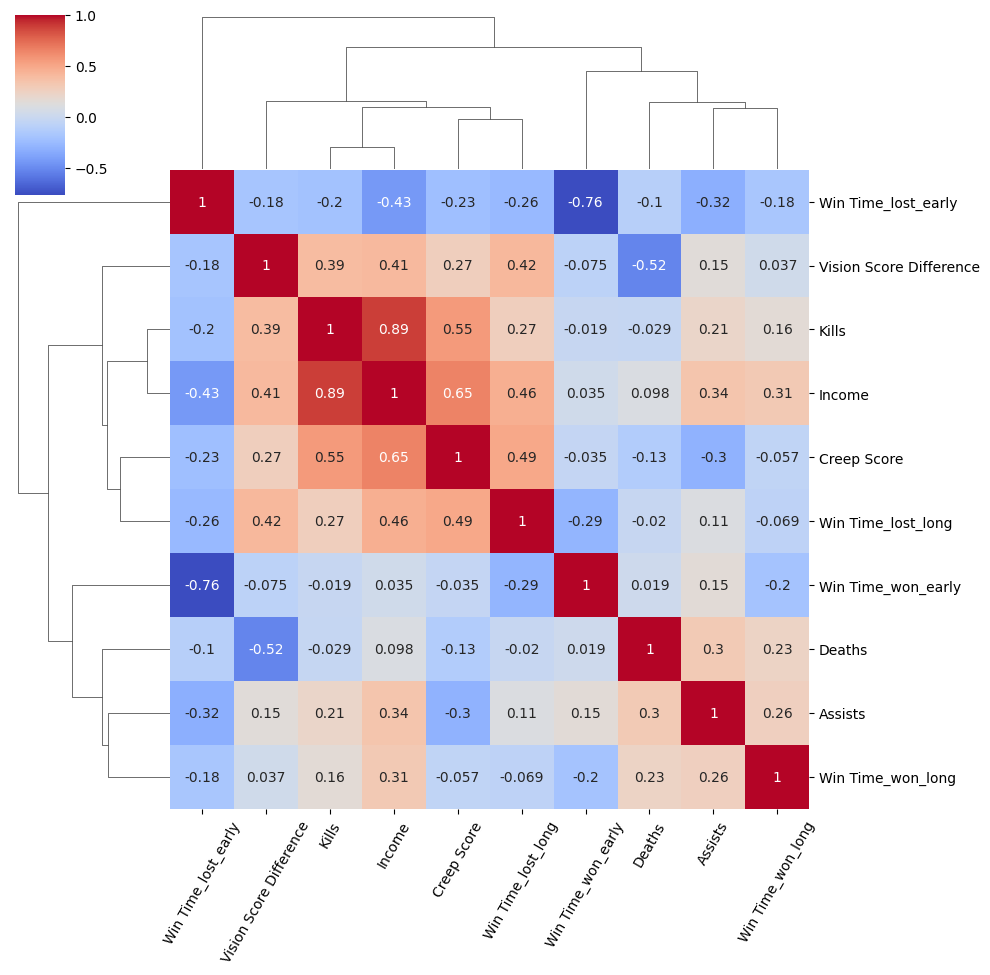

In [ ]:
ax = sns.clustermap(df.corr(),
                   method = 'complete',
                   cmap   = 'coolwarm',
                   annot  = True,
                   annot_kws = {'size': 10})
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=60);
#The heatmap of the total enemy first blood information

In [ ]:
summoner_tables = {}

# Get unique summoner names from the dataset
unique_summoner_names = df['Summoner Name'].unique()

# Loop through the unique summoner names
for i, summoner_name in enumerate(unique_summoner_names[:5], start=1):
    # Create a new DataFrame for the summoner
    summoner_df = df[df['Summoner Name'] == summoner_name].reset_index(drop=True)

    # Store the summoner DataFrame in the dictionary
    summoner_tables[f"Summoner {i}"] = summoner_df

# Print the separate DataFrames
for summoner_label, summoner_df in summoner_tables.items():
    print(f"{summoner_label} Table:")
    print(summoner_df)
    print("-" * 30)


Summoner 1 Table:
  Summoner Name        Match ID  Kills  Deaths  Assists  Creep Score  Income  \
0       zepacks  NA1_4758731842      4       1        8           13    6929   
1       zepacks  NA1_4758678225      2       7       18           28    6821   
2       zepacks  NA1_4754881078      1       1       12           29    7976   
3       zepacks  NA1_4754030455      8       9       15           75   14606   
4       zepacks  NA1_4758638133      4       9       17           18    7862   
5       zepacks  NA1_4755115898      1       4       10           30    6926   
6       zepacks  NA1_4754009313      8       7        9          187   13621   

   Vision Score Difference  Win Time_lost_early  Win Time_lost_long  \
0                       31                    0                   0   
1                       -4                    0                   0   
2                       18                    0                   0   
3                        5                    0          

<ipython-input-30-56db20bfe1d8>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = summoner_subset.corr()


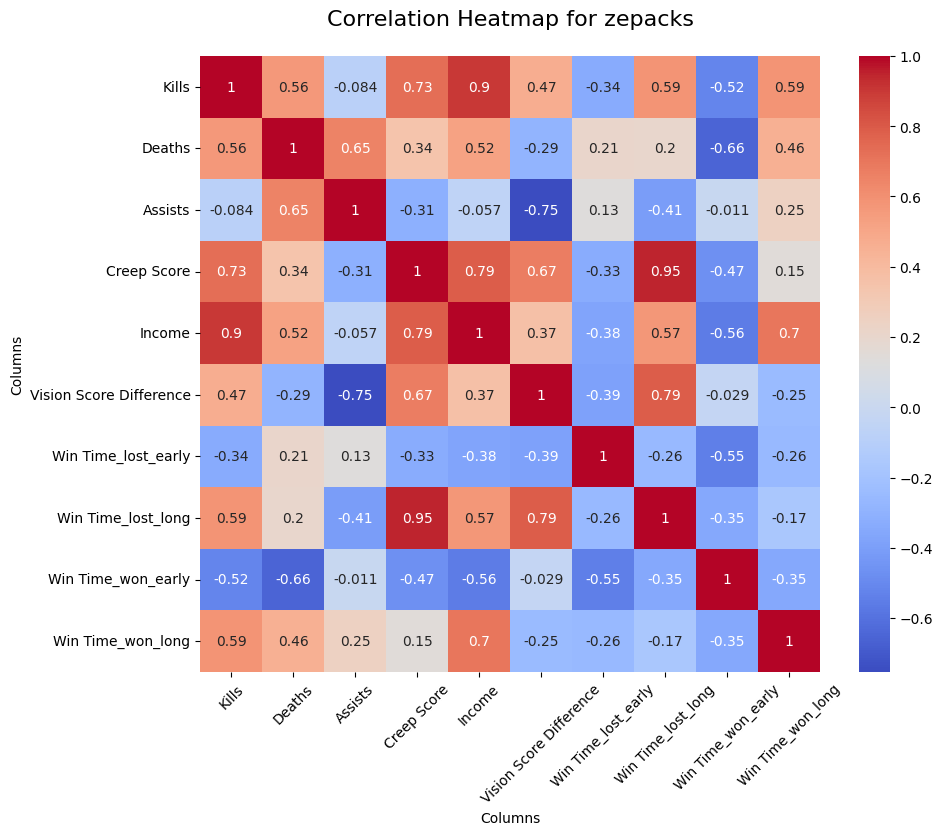

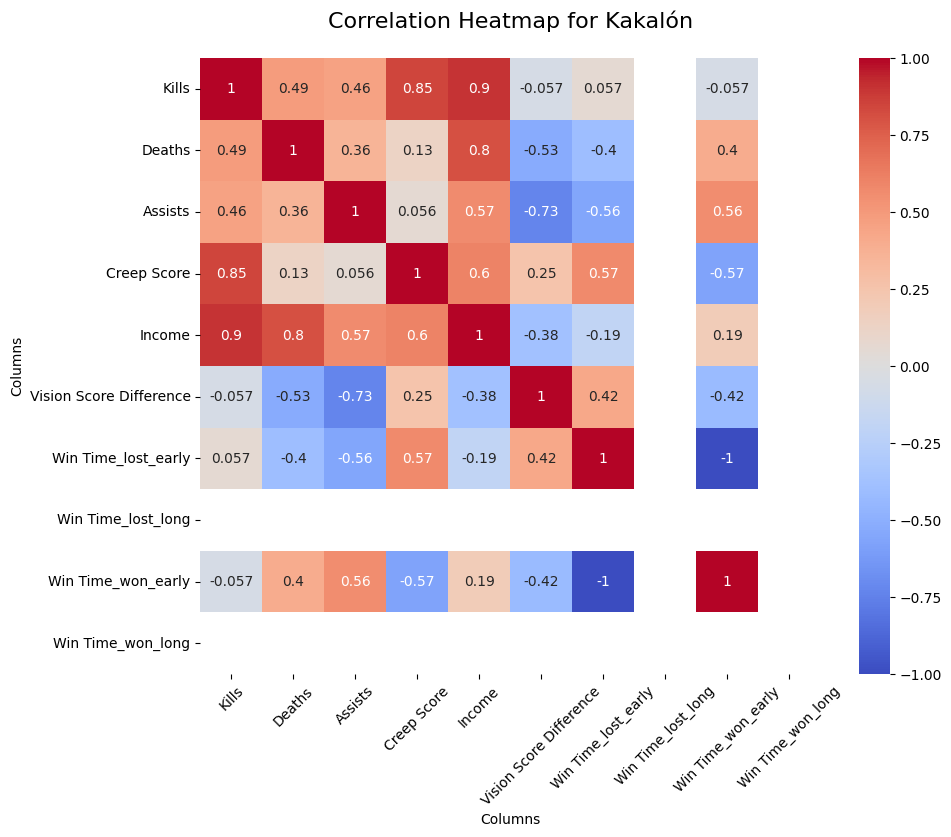

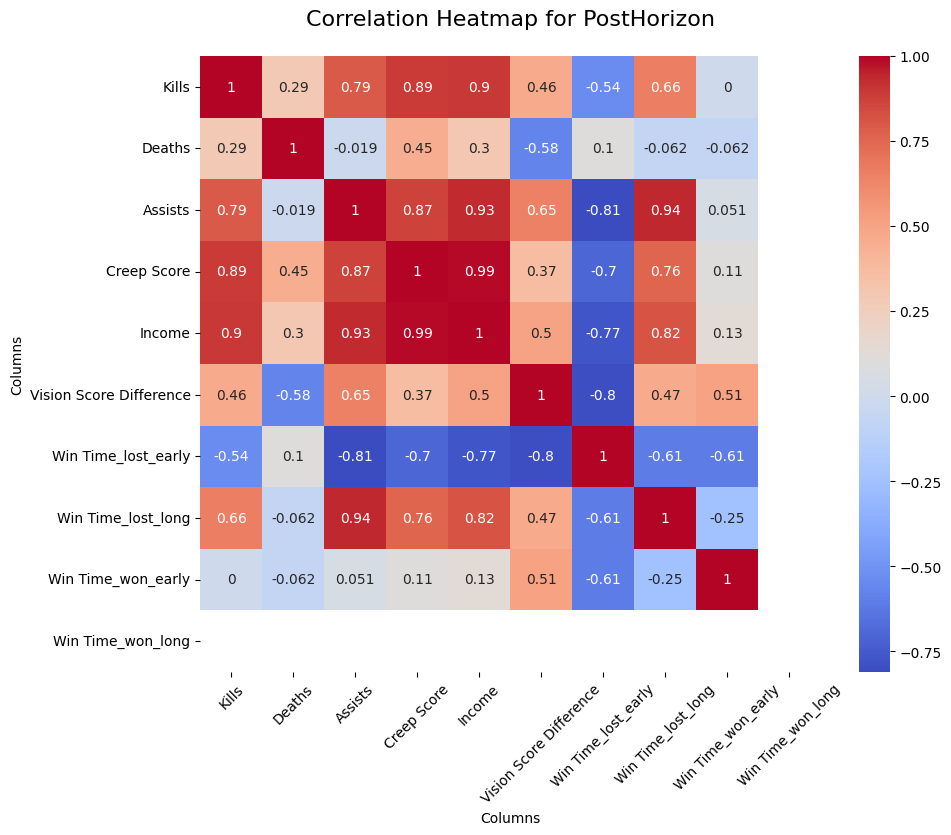

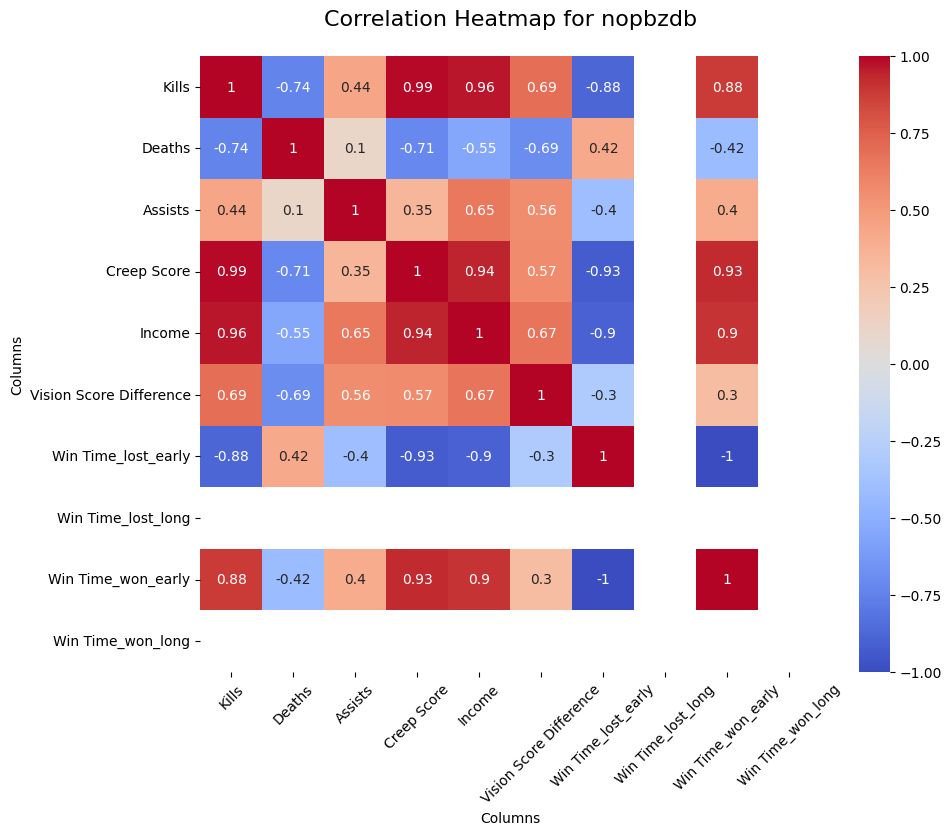

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


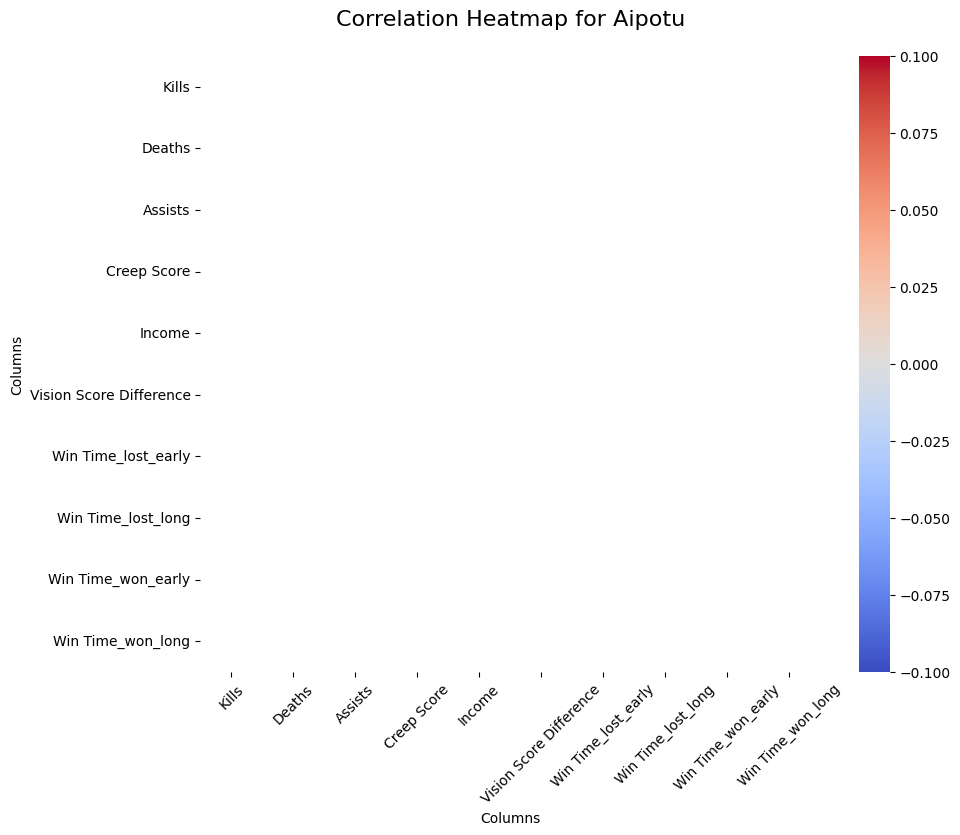

In [ ]:
# Loop through the summoner_tables dictionary
for summoner_label, summoner_df in summoner_tables.items():
    # Loop through all the summoner names in the DataFrame
    for summoner_name in summoner_df['Summoner Name'].unique():
        # Filter the DataFrame for the current summoner
        summoner_subset = summoner_df[summoner_df['Summoner Name'] == summoner_name]

        # Calculate the correlation matrix
        correlation_matrix = summoner_subset.corr()

        # Create the heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix,
                    cmap='coolwarm',
                    annot=True,
                    annot_kws={'size': 10})

        # Set x-axis and y-axis labels
        plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
        plt.yticks(rotation=0)
        plt.xlabel("Columns")
        plt.ylabel("Columns")

        plt.title("")  # Clear the default title
        plt.text(0.5, 1.05, f"Correlation Heatmap for {summoner_name}",
                 horizontalalignment='center',
                 fontsize=16,
                 transform=plt.gca().transAxes)

        plt.show()

In [ ]:
correlated_statements = {}

# Iterate through each summoner's data
for summoner_label, summoner_df in summoner_tables.items():
    summoner_name = summoner_df['Summoner Name'].iloc[0]

    # Select columns related to "Win Time"
    win_time_columns = ["Win Time_lost_early", "Win Time_lost_long", "Win Time_won_early", "Win Time_won_long"]

    # Calculate correlations with each "Win Time" column
    correlations = summoner_df.corr()[win_time_columns]

    # Remove the same "Win Time" columns from the correlations
    correlations = correlations.drop(index=win_time_columns)

    # Prepare the correlated statements
    statements = []
    for col in correlations.columns:
        top_positive_correlations = correlations[col].nlargest(3)
        top_negative_correlations = correlations[col].nsmallest(3)

        if (all(np.isnan(top_positive_correlations)) or
            all(top_positive_correlations.isin([1.0, -1.0, np.nan])) or
            all(top_negative_correlations.isin([1.0, -1.0, np.nan]))):
            statements.append(f"{summoner_name} has not played enough {col} games recently.")
        else:
            positive_correlation_strings = ", ".join([f"{variable_name} ({correlation:.2f})" for correlation, variable_name in zip(top_positive_correlations, top_positive_correlations.index)])
            negative_correlation_strings = ", ".join([f"{variable_name} ({correlation:.2f})" for correlation, variable_name in zip(top_negative_correlations, top_negative_correlations.index)])

            statements.append(f"When {summoner_name} has {col}, the biggest correlated factors to their wins are: {positive_correlation_strings}, and their biggest factors to their losses are: {negative_correlation_strings}")

    # Store the correlated statements in the dictionary
    correlated_statements[summoner_name] = statements

# Print the correlated statements
for summoner_name, statements in correlated_statements.items():
    for statement in statements:
        print(statement)
    print("-" * 30)


When zepacks has Win Time_lost_early, the biggest correlated factors to their wins are: Deaths (0.21), Assists (0.13), Creep Score (-0.33), and their biggest factors to their losses are: Vision Score Difference (-0.39), Income (-0.38), Kills (-0.34)
When zepacks has Win Time_lost_long, the biggest correlated factors to their wins are: Creep Score (0.95), Vision Score Difference (0.79), Kills (0.59), and their biggest factors to their losses are: Assists (-0.41), Deaths (0.20), Income (0.57)
When zepacks has Win Time_won_early, the biggest correlated factors to their wins are: Assists (-0.01), Vision Score Difference (-0.03), Creep Score (-0.47), and their biggest factors to their losses are: Deaths (-0.66), Income (-0.56), Kills (-0.52)
When zepacks has Win Time_won_long, the biggest correlated factors to their wins are: Income (0.70), Kills (0.59), Deaths (0.46), and their biggest factors to their losses are: Vision Score Difference (-0.25), Creep Score (0.15), Assists (0.25)
--------

<ipython-input-31-f8d56479e5f0>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = summoner_df.corr()[win_time_columns]
<ipython-input-31-f8d56479e5f0>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = summoner_df.corr()[win_time_columns]
<ipython-input-31-f8d56479e5f0>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = summoner_df.corr()[win_time_columns]
<ipython-input-31-f8d56479e5f0>:12: FutureWarning: The default value of numeric

In [ ]:
# Print the correlated statements
for summoner_name, statements in correlated_statements.items():
    for statement in statements:
        print(statement)
        print()
    print("-" * 30)


When zepacks has Win Time_lost_early, the biggest correlated factors to their wins are: Deaths (0.21), Assists (0.13), Creep Score (-0.33), and their biggest factors to their losses are: Vision Score Difference (-0.39), Income (-0.38), Kills (-0.34)

When zepacks has Win Time_lost_long, the biggest correlated factors to their wins are: Creep Score (0.95), Vision Score Difference (0.79), Kills (0.59), and their biggest factors to their losses are: Assists (-0.41), Deaths (0.20), Income (0.57)

When zepacks has Win Time_won_early, the biggest correlated factors to their wins are: Assists (-0.01), Vision Score Difference (-0.03), Creep Score (-0.47), and their biggest factors to their losses are: Deaths (-0.66), Income (-0.56), Kills (-0.52)

When zepacks has Win Time_won_long, the biggest correlated factors to their wins are: Income (0.70), Kills (0.59), Deaths (0.46), and their biggest factors to their losses are: Vision Score Difference (-0.25), Creep Score (0.15), Assists (0.25)

----